<p> <font size=4> This is a just a simple data set analysis of <a href=archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset>UCI's Bike Sharing data set</a>.

<br />
<ul>
    <li> Download the dataset and extract the files into a directory.</li>
    <li>Place this notebook in that same directory.</li>
    <li>Enjoy :)</li>
</ul>

</font> </p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
hr = pd.read_csv('hour.csv')
hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# instant is same as index, and if we want to do hourly predictions and not anomaly detection, 
# 'date' feature largely won't have much influence. So let's drop these 2 columns

hr.drop(['instant', 'dteday'], axis=1, inplace=True)
hr.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h2> Data Exploration & Analysis </h2>

<p> <font size=3> Since the ultimate goal is to predict the <i>total bikes rented</i>, we shall see what factors 
    influence that prediction. Alongside we shall try to uncover any interesting facts while making more sense of
    the data.

    There would be mainly two sections... We analyze <br />
    <ul>
        <li> how each feature influences our main goal of predicting the total no. of bikes rented 🚴 </li>
        <li> some interesting observations based on users (casual / registered) </li>
     </ul>
    </font>

<font> </font>
</p>

In [4]:
import seaborn as sns

In [5]:
from bokeh.charts import Bar, show, Histogram, Donut
from bokeh.models import Axis
from bokeh.io import output_notebook

In [6]:
output_notebook()

Loading BokehJS ...

<h3> Checking for data bias towards any season </h3>

In [7]:
# seasons in the order (1, 2, 3, 4)  based on the documentation provided
seasons = ['spring', 'summer', 'fall', 'winter']

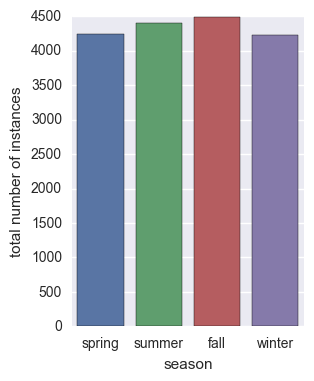

In [8]:
# Let's check if the data is skewed / biased towards any given season

plt.figure(figsize=(3, 4))
ax = sns.countplot('season', data=hr)
ax.set_xticklabels(seasons)
ax.set_ylabel('total number of instances')

plt.show()

<p> <font size=4> This shows that we have no data biased towards any given season 😊

<br />
<br />

 Let's find out the usage of bikes by season </font> (Here the term <i>usage</i> is used more often instead of 'rented' as it's implicitly implied)

</p>

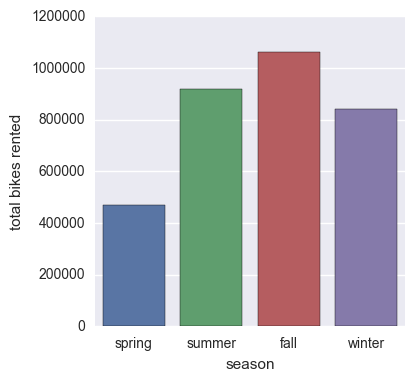

In [9]:
plt.figure(figsize=(4, 4))

ax = sns.barplot('season', 'cnt', data=hr, estimator=sum, ci=None)
ax.set_xticklabels(seasons)
ax.set_ylabel('total bikes rented')

plt.show()

In [10]:
hr.cnt.groupby(hr.season).sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

<h3> Analysis </h3>

<p> <font size=3>  This shows that people ride more often in <i>Summer & Fall</i>, compared to the other two seasons. 
    Surprisingly, more people rode in <i>Winter</i> than in <i>Spring</i>. 🤔 </font>
</p>

<p> <font size=3> To find out more, let's compare the usage by Month </font> </p>

In [11]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')

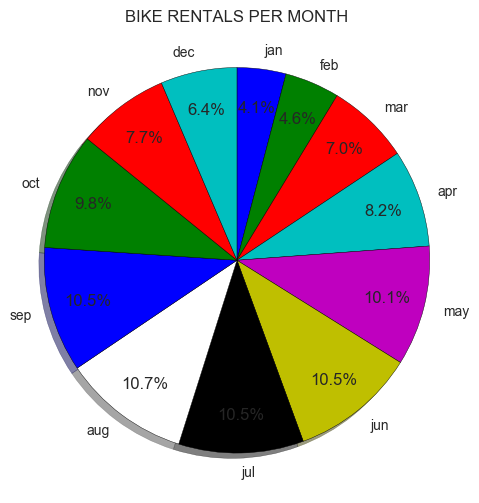

In [12]:
plt.figure(figsize=(5, 6))


sizes = hr.cnt.groupby(hr.mnth).sum().tolist()
plt.pie(sizes, labels=months, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=.8, counterclock=False)
plt.axis('equal')
plt.title('BIKE RENTALS PER MONTH')

plt.show()


In [13]:
# Let's see what months fall under which season
hr.mnth.groupby(hr.season).unique()

season
1      [1, 2, 3, 12]
2       [3, 4, 5, 6]
3       [6, 7, 8, 9]
4    [9, 10, 11, 12]
Name: mnth, dtype: object

<h3> Analysis </h3>

<p> <font size=3> We can see that more bikes are rented from <i>April</i> till <i>October</i> than the rest 
    of the year with each month in that period consituting around 10% thus (60% of total months) accounting to 70% of the total usage
    in the 2 years (2011-12).

<br />
<br />

    Another representation of the above information is shown below depicting the <i>average</i> number of bikes rented
    per month.

</font></p>

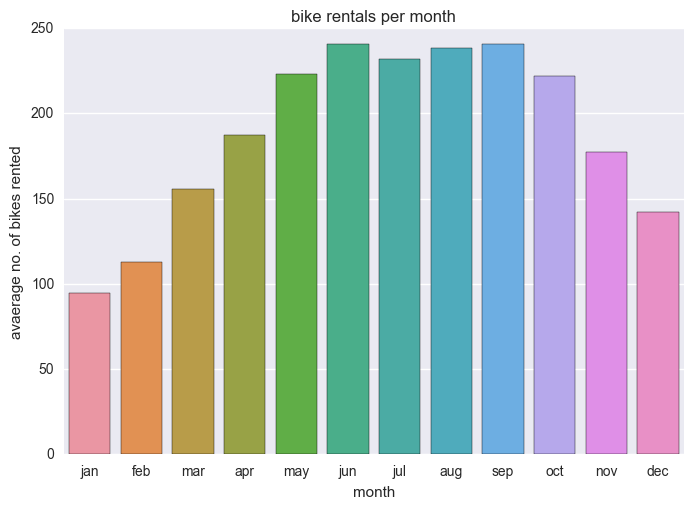

In [14]:
ax = sns.barplot('mnth', 'cnt', data=hr, estimator=np.mean, ci=None)

ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

<br />

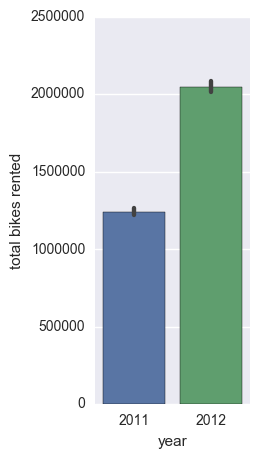

In [15]:
plt.figure(figsize=(2, 5))

ax = sns.barplot('yr', 'cnt', data=hr, estimator=sum)
ax.set_xticklabels(['2011', '2012'])

ax.set_ylabel('total bikes rented')
ax.set_xlabel('year')

plt.show()

In [16]:
cas_0 = hr[hr.yr == 0].casual.sum()
reg_0 = hr[hr.yr == 0].registered.sum()

cas_1 = hr[hr.yr == 1].casual.sum()
reg_1 = hr[hr.yr == 1].registered.sum()

percent_inc_casual = 100. * (cas_1 - cas_0) / cas_0
percent_inc_registered = 100. * (reg_1 - reg_0) / reg_0

print ('\n ****** \n \tThe bike rentals from casual users increased {:.2f}% from 2011 to 2012, whereas \n \
       it shot up by {:.2f}% for registered users. 🙀😱 \n ****** \n'.format(percent_inc_casual, percent_inc_registered))


 ****** 
 	The bike rentals from casual users increased 50.76% from 2011 to 2012, whereas 
        it shot up by 68.38% for registered users. 🙀😱 
 ****** 



<h3> Analysis </h3>

<p> <font size=3> We observe that the usage of bikes has increased from the year 2011 to 2012 in the both the sections of the users: 'casual' and 'registered'.

<br />
<br />

    Below graph shows how the rentals increased per month from 2011 to 2012. The labels <b>0</b> & <b>1</b> below correspond to the years <b>2011</b> & <b>2012</b> respectively.
</font> </p>

In [17]:
bar = Bar(hr, values='cnt', label='mnth', stack='yr', agg='sum', plot_width=700, plot_height=500, tools='')

yaxis = bar.select(dict(type=Axis, layout="left"))[0]
yaxis.formatter.use_scientific = False
yaxis.axis_label = 'total bikes rented'

xaxis = bar.select(dict(type=Axis, layout="below"))[0]
xaxis.axis_label = 'Month'

show(bar)

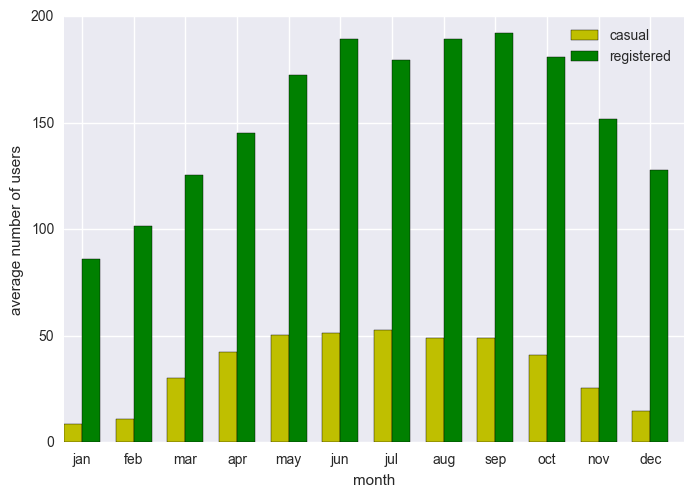

In [18]:
N = 12

y1 = hr.casual.groupby(hr.mnth).mean().tolist()

x = np.arange(N)
width = 0.35   # bar width

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(x, y1, width, color='y')

y2 = hr.registered.groupby(hr.mnth).mean().tolist()
rects2 = ax.bar(x+width, y2, width, color='g')

ax.set_ylabel('average number of users')
ax.set_xticks(x+width)
ax.set_xticklabels(months)
ax.set_xlabel('month')
ax.legend( (rects1[0], rects2[0]), ('casual', 'registered') )

plt.show()


<h3> Analysis </h3>

<p> <font size=3> The above graph shows the average number of casual and registered users that rented bikes each month in the 2 years. We can observe that the average of the registered users group is far higer than the casual people but the rental pattern is almost the same for both. </font> </p>

In [19]:
hr.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


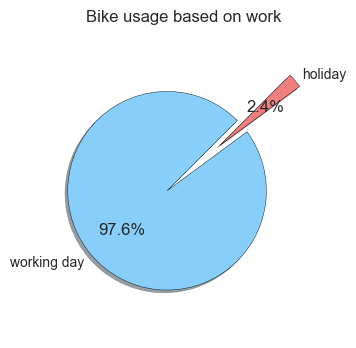

In [20]:
plt.figure(figsize=(3, 4))

labels = 'working day', 'holiday'
sizes = hr.cnt.groupby(hr.holiday).sum().tolist()
colors = ['lightskyblue', 'lightcoral']
explode = (0.4, 0.3)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Bike usage based on work')
plt.show()

<h3> Analysis </h3>

<p> <font size=3> Surprisingly, the proportion of people renting bikes on a holiday 🏖🍹 is far far less compared 
    to the ones that are rented on a typical working day 🖥 📚
</font> </p>

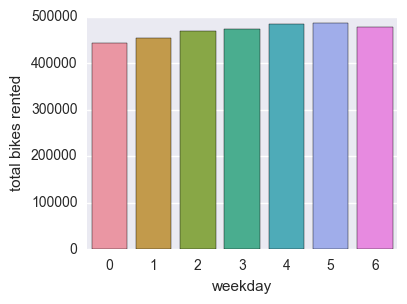

In [21]:
plt.figure(figsize=(4, 3))
ax = sns.barplot('weekday', 'cnt', data=hr, estimator=sum, ci=None)

ax.set_ylabel('total bikes rented')
ax.set_xlabel('weekday')

plt.show()

<h3> Analysis </h3>

<p> <font size=3> The day of the week has little effect on the total bikes rented. We can observe that the consumption increases gradually from day 0 (Sunday) to day 5 with a slight decrease on the last weekday. 🏋  </font> </p>

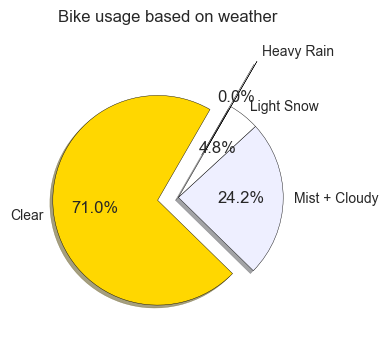

In [22]:
plt.figure(figsize=(3, 4))

labels = 'Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'
sizes = hr.cnt.groupby(hr.weathersit).sum().tolist()
colors = ['gold', '#eeefff', 'white', 'black']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()

<h3> Analysis </h3>

<p> <font size=3> Clearly weather plays an important role while renting bikes with a major share attributing to <i>Clear</i> weather than any of the other options 🌞 💃. Almost a quarter of the people are fine with riding in a 'misty' & 'cloudy' ⛅️ weather and with very few people riding during snowy ⛄ conditions. Unsurprisingly almost no one rode during heavy rains ⛈ ⚡️ 🚴 🙅 😔</font> </p>

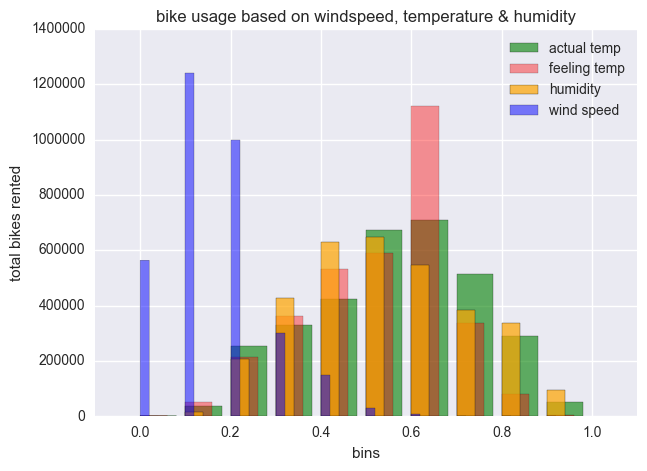

In [23]:
ax = plt.figure(figsize=(7, 5))
plt.hist(hr.temp, bins=np.arange(0, 1.1, .1), weights=hr.cnt, color='green', alpha=0.6, 
         label='actual temp', width=0.08, align='mid')
plt.hist(hr.atemp, bins=np.arange(0, 1.1, .1), weights=hr.cnt, color='red', alpha=.4, 
         label='feeling temp', width=0.06, align='mid')
plt.hist(hr.hum, bins=np.arange(0, 1.1, .1), weights=hr.cnt, color='orange', alpha=.7, 
         label='humidity', width=0.04, align='mid')
plt.hist(hr.windspeed, bins=np.arange(0, 1.1, .1), weights=hr.cnt, color='blue', alpha=.5, 
         label='wind speed', width=0.02, align='mid')

plt.xlabel('bins')
plt.ylabel('total bikes rented')
plt.legend()
plt.xlim(-0.1, 1.1)

plt.title('bike usage based on windspeed, temperature & humidity')
plt.show()

<h3> Analysis </h3>

<p> <font size=3> A lot of insights can be gained from the above self-explanatory graph. Here, we compare how the temperature, humidity, windspeed has an effect on bike rentals. 

<br />
<br />

Let's keep the information contained above aside for a moment and think in general how these factors influence the bike usage. It's safe to assume that most people won't ride a bike in  extreme conditions (unless they are superhumans or asked by their bosses 😉), be it too windy / too hot / too cold / too humid. So we expect to see a normal distribution in all these cases (with fewer people riding in extreme conditions and more people riding in pleasant weather) and we see just that above 😅. Here, all the readings are normalized between [0, 1] (MinMax scaled). We can infer the following from the graph above: 

<br />

<ul>
    <li>Most poeple ride when there is a pleasant wind and fewer people as it gets more windy</li>
    <li>No one rode when it's not humid (dry weather) with most people riding when it's half of its max value 
        <font size=2><i>(100 from the documentation)</i></font></li>
    <li>We can also see the normal distribution of the rental pattern based on temperature, be it the actual one or 
        the one being felt with many of them riding when they both range in [0.5, 0.7] (normalized).
        (The real maximum temperatures are 41° & 50° for actual and feeling temperatures respectively)</li>
</ul>


</font> </p>

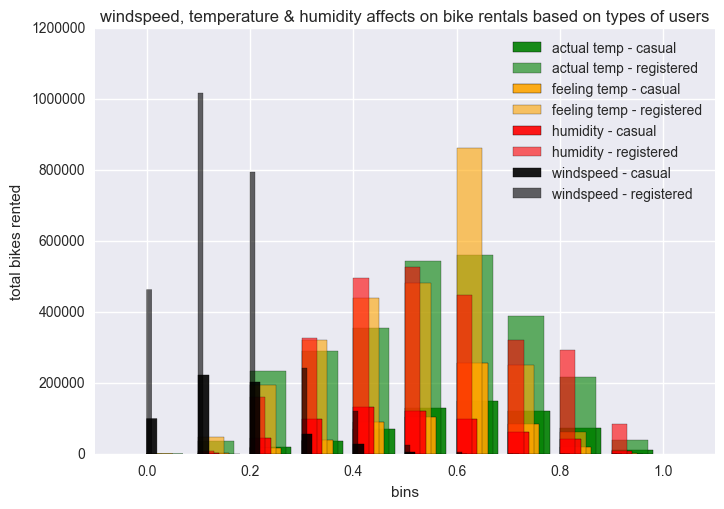

In [24]:
plt.hist(hr.temp, bins=np.arange(0, 1.1, .1), weights=hr.casual, color='green', alpha=0.9, 
         label='actual temp - casual', width=0.08, align='mid')
plt.hist(hr.temp, bins=np.arange(0, 1.1, .1), weights=hr.registered, color='green', alpha=0.6, 
         label='actual temp - registered', width=0.07, align='mid')
plt.hist(hr.atemp, bins=np.arange(0, 1.1, .1), weights=hr.casual, color='orange', alpha=0.9, 
         label='feeling temp - casual', width=0.06, align='mid')
plt.hist(hr.atemp, bins=np.arange(0, 1.1, .1), weights=hr.registered, color='orange', alpha=0.6, 
         label='feeling temp - registered', width=0.05, align='mid')
plt.hist(hr.hum, bins=np.arange(0, 1.1, .1), weights=hr.casual, color='red', alpha=0.9,
         label='humidity - casual', width=0.04, align='mid')
plt.hist(hr.hum, bins=np.arange(0, 1.1, .1), weights=hr.registered, color='red', alpha=0.6,
         label='humidity - registered', width=0.03, align='mid')
plt.hist(hr.windspeed, bins=np.arange(0, 1.1, .1), weights=hr.casual, color='black', alpha=0.9, 
         label='windspeed - casual', width=0.02, align='mid')
plt.hist(hr.windspeed, bins=np.arange(0, 1.1, .1), weights=hr.registered, color='black', alpha=0.6, 
         label='windspeed - registered', width=0.01, align='mid')

plt.xlabel('bins')
plt.ylabel('total bikes rented')
plt.legend()
plt.xlim(-0.1, 1.1)

plt.title('windspeed, temperature & humidity affects on bike rentals based on types of users')
plt.show()


<h3> Analysis </h3>

<p> <font size=3> Here we reconsider the same factors as before but this time, we try to see how the affects vary amongst casual and registered users. We observe that the rental patterns are the same for both types of users. </font> </p>

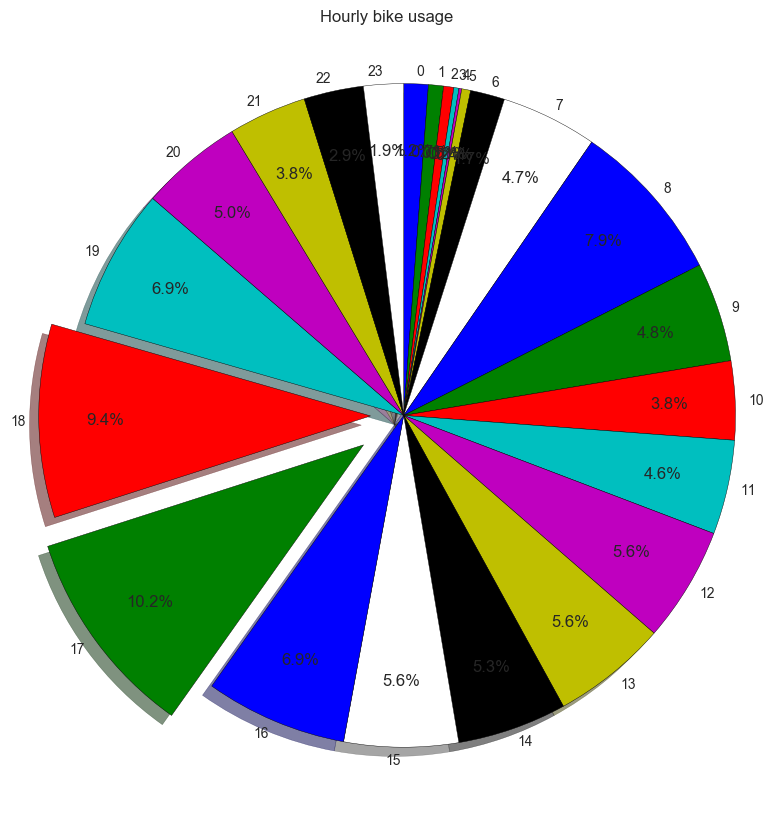

In [25]:
plt.figure(figsize=(9, 10))

labels = list(range(24))
sizes = hr.cnt.groupby(hr.hr).sum().tolist()
# colors = ['gold', '#eeefff', 'white', 'black']
explode = np.zeros(24)
explode[17] = 0.15
explode[18] = 0.1

plt.pie(sizes, labels=labels, shadow=True, startangle=90, pctdistance=.8, explode=explode, #colors=colors,
        autopct='%1.1f%%',  counterclock=False, labeldistance=1.04)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Hourly bike usage')
plt.show()

<h3>Analysis</h3>

<p> <font size=3> The above figure shows hourly rentals over the period of two years. Not so surprisingly, they're very less in the wee hours of the day and more active from early noon to late evenings. However, the time between 5 and 7 pm has peak demand constituting about 20% of the total. Hence, it's a wise choice to make more bikes available during that period to avoid shortage.

<br />
<br />

    The plot below offers more interesting information.
</font>
</p>

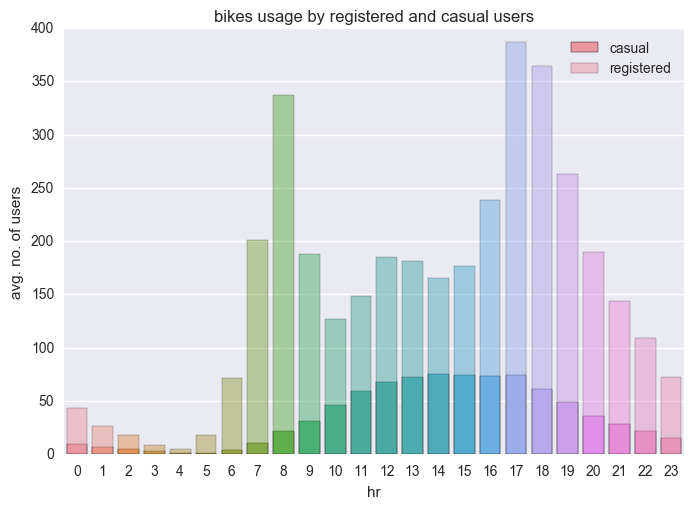

In [26]:
sns.barplot('hr', 'casual', data=hr, estimator=np.mean, label='casual', ci=None)
sns.barplot('hr', 'registered', data=hr, estimator=np.mean, alpha=.5, label='registered', ci=None)

plt.title('bikes usage by registered and casual users')
plt.ylabel('avg. no. of users')
plt.legend()

plt.show()

<h3> Analysis </h3>

<p> <font size=3> This shows the hourly rental pattern for casual and registered users. There are clearly 2 peaks in  the latter group's usage whilst there's only one for the former. The registerd users are more likely to rent more in the mornings and evenings resembling typical work timings whereas the casual users are active right from early noon and maintain almost the same rate till evening.
</font>
</p>

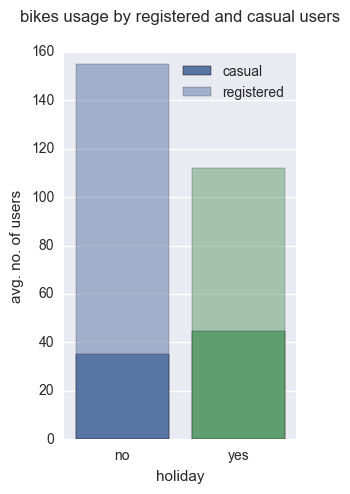

In [27]:
plt.figure(figsize=(3, 5))

ax1 = sns.barplot('holiday', 'casual', data=hr, estimator=np.mean, label='casual', ci=None)
ax2 = sns.barplot('holiday', 'registered', data=hr, estimator=np.mean, alpha=.5, label='registered', ci=None)

plt.title('bikes usage by registered and casual users', y=1.06)
plt.ylabel('avg. no. of users')
plt.legend()

ax2.set_xticklabels(['no', 'yes'])
plt.show()

<h3> Analysis </h3>

<p> <font size=3> The above picture shows the average number of bikes rented on a holiday based on the category of users. Surprisingly the usage pattern is opposite for both categories with casual people riding more on a holiday and vice versa for the registered ones.
</font>
</p>

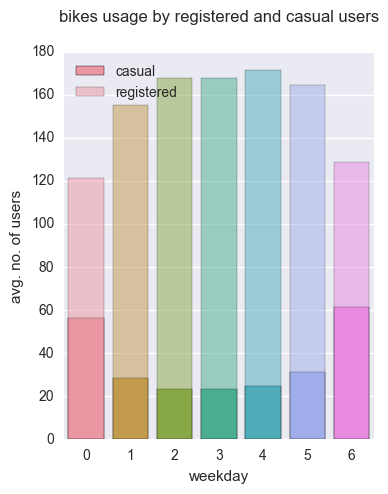

In [28]:
plt.figure(figsize=(4, 5))

ax1 = sns.barplot('weekday', 'casual', data=hr, estimator=np.mean, label='casual', ci=None)
ax2 = sns.barplot('weekday', 'registered', data=hr, estimator=np.mean, alpha=.5, label='registered', ci=None)

plt.title('bikes usage by registered and casual users', y=1.06)
plt.ylabel('avg. no. of users')
plt.legend(loc='best')

# ax2.set_xticklabels()
plt.show()

<h3> Analysis </h3>

<p><font size=3> Here we see another contrasting behaviour of casual riders but this time based on days. They rented more at the start and end of weekdays with their usage (incl. on other days) primarily resembling a <i>trough</i> while that of the registered users resembling a <i>crest</i>. We see that casual riders are more active on weekends (days 0 & 6: Sun, Sat) while the registered users are more active on 'working' days.   </font></p> 

<h2> Conclusion </h2>

<p><font size=3>

We have analyzed the cycle sharing data from 2 years (2011 & 2012) and made a few interesting observations. The following gives a quick overview:

<br />
<br />

The usage has increased from 2011 to 2012 and more people rode during summer & fall with 70% of the total rentals occurring in the months between April & October, that too primarily on a working day. While the registered users were more active on weekdays, the causal riders rented more bikes on weekends and holidays. The former's usage peaked during mornings & evenings, most likely because of commuting to work while the latter's group was more active from afternoon till evening. Overall, the hourly usage peaked in the evenings between 5 & 7 pm. 

<br />

As far as the weather is considered, nearly 70% of the people preferred to rode when it's clear or sunny while almost no one rode during heavy rains & thunderstorms. They rented more bikes when there was slight breeze (to no wind) and under pleasant and moderate temperature & humidity conditions.

<br />
<br />

So, based on the above observations, to improve the service, the company can make more bikes available (a) between April & October, (b) during peak commuting office hours and evenings, (c) under pleasant weather. It should also take into account the usage patterns of casual & registered riders described above to improve their experience.

<br />
<br />


</font></p>